In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

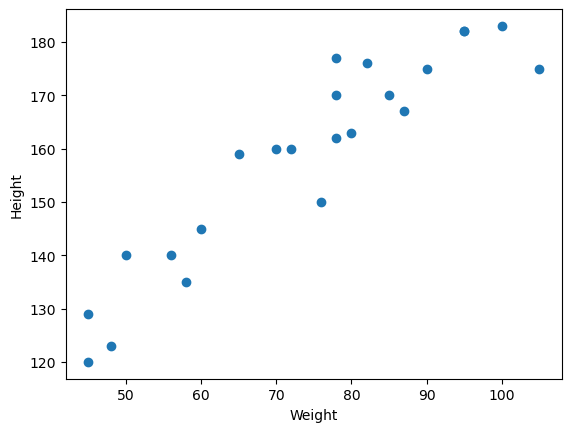

In [4]:
##Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
##Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


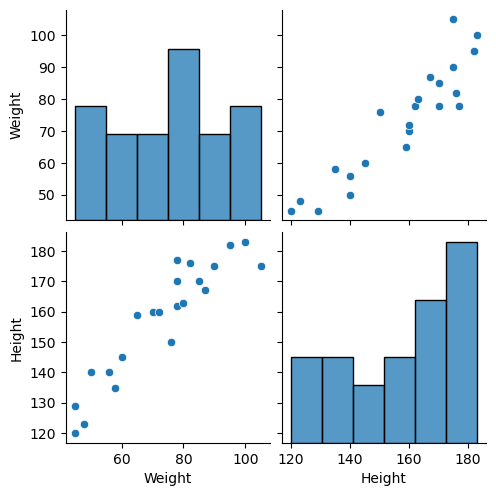

In [6]:
##Seaborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array

In [8]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [12]:
X_test=scaler.transform(X_test)

In [13]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [14]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression(n_jobs=-1)

In [16]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [17]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


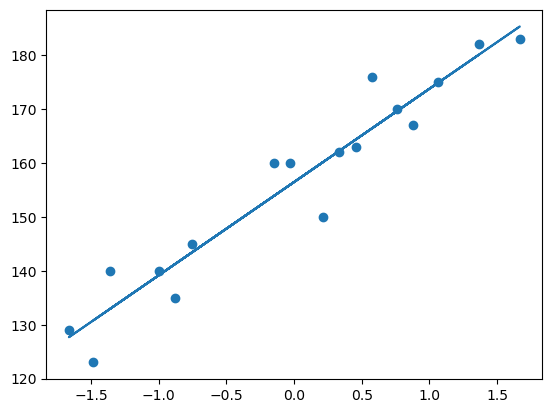

In [18]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
- predicted height output= intercept +coef_(Weights)
- y_pred_test =156.470 + 17.29(X_test)

In [19]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [20]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


### R square
Formula
#### R^2 = 1 - SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [22]:
from sklearn.metrics import r2_score

In [23]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [24]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.6701033397476595

In [25]:
## OLS Linear Regression
import statsmodels.api as sm

In [26]:
model=sm.OLS(y_train,X_train).fit()

In [27]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [28]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 07 Jan 2024   Prob (F-statistic):                       0.664
Time:                        02:13:56   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

array([155.97744705])

# Multiple Linear Regression

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
df_index=pd.read_csv("economic_index.csv")

In [32]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [33]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [34]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [35]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

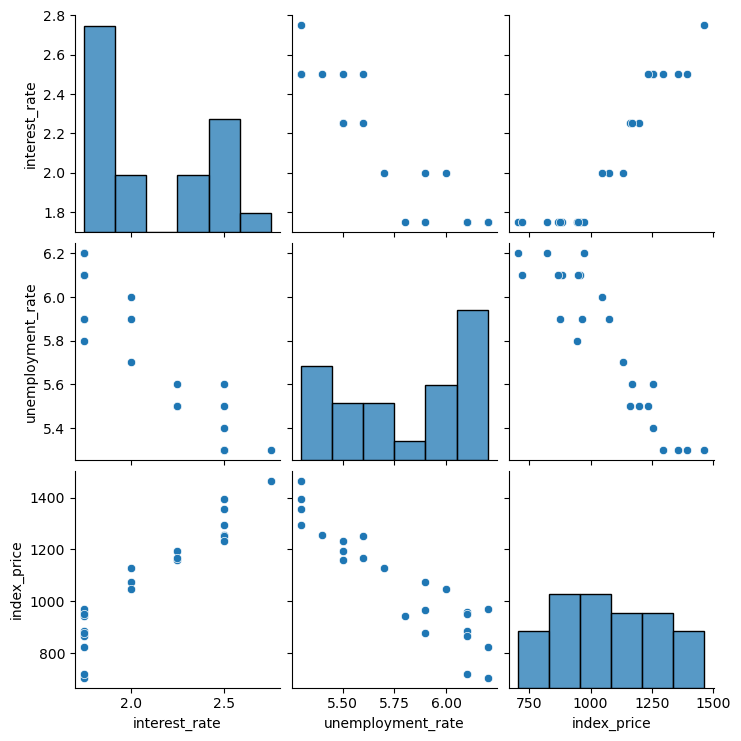

In [36]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index)

Text(0, 0.5, 'unemployment rate')

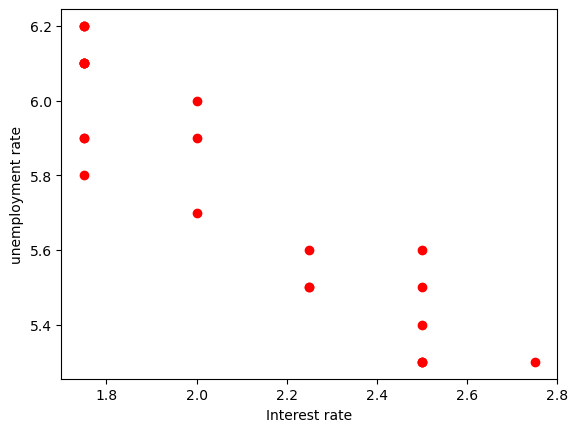

In [37]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [38]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [39]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [40]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [41]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
import seaborn as sns

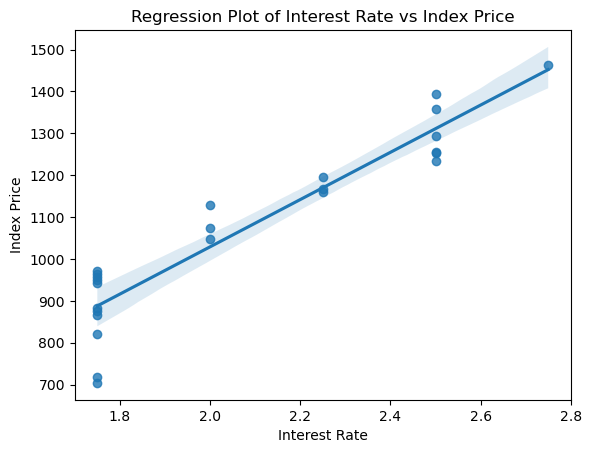

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_index is your Pandas DataFrame

# Replace 'interest_rate' and 'index_price' with your column names if they're different
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Regression Plot of Interest Rate vs Index Price')
plt.show()


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

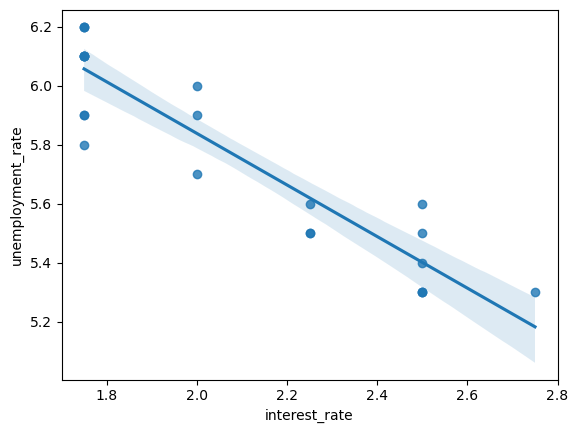

In [44]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

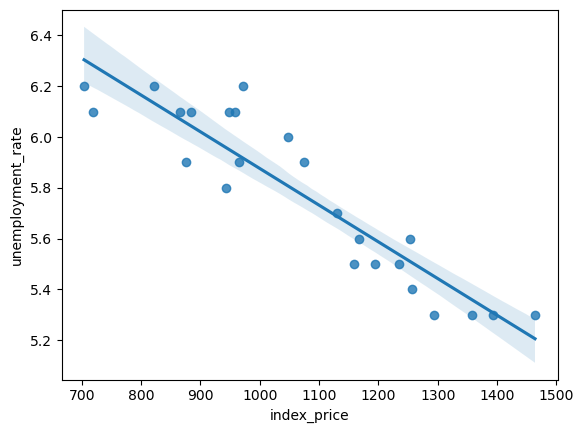

In [45]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [48]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [49]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [50]:
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [52]:
np.mean(validation_score)

-5914.8281801623925

In [53]:
## prediction
y_pred=regression.predict(X_test)

In [54]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [55]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


### Assumptions 

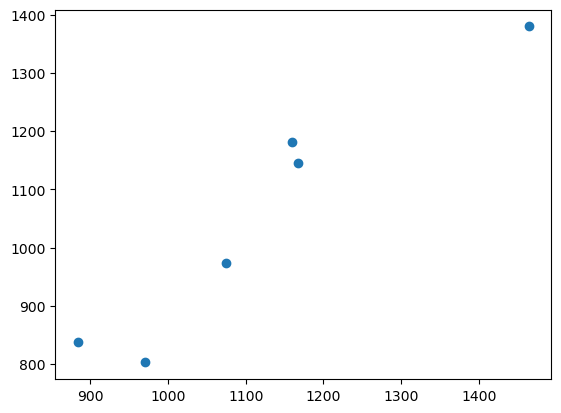

In [57]:
plt.scatter(y_test,y_pred)

In [58]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


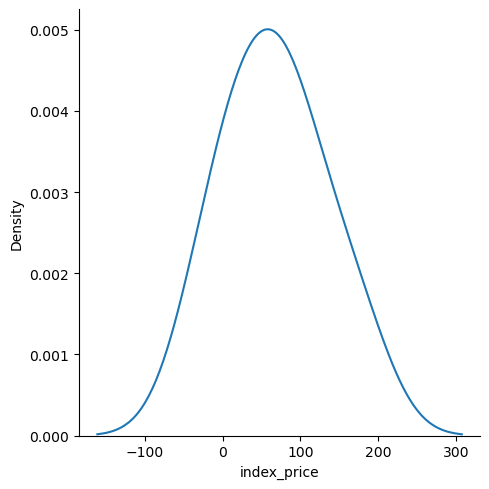

In [64]:
## Plot this residuals
sns.displot(residuals,kind='kde')

we had got normal distribution.if we are getting bell shaped curve it mean that the model we had created is good

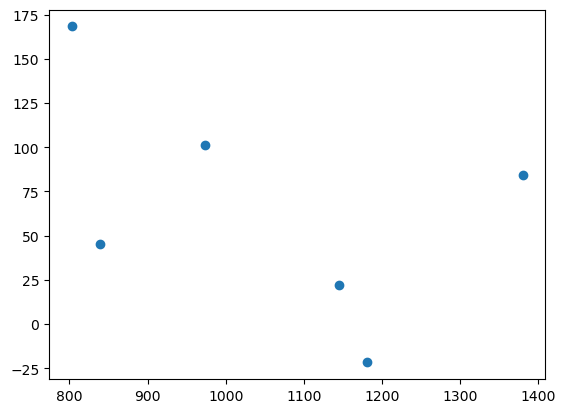

In [60]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

we had got the data is uniformly distributied.it states that there is no problem in created model.

In [65]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 07 Jan 2024   Prob (F-statistic):                       0.754
Time:                        02:19:57   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
print(regression.coef_)

[  88.27275507 -116.25716066]
